In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [12]:
env='Ant-v4'

In [13]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [14]:
df = pd.DataFrame()
for i in range(1,6):
  path ='data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df = pd.concat([df,aux])
df = df.set_index(["Trial"])
print(df.shape)

(1265, 15)


In [15]:
df.head(15)

,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep
Trial,,,,,,,,,,,,,,,
1,1,Ant-v4,17-05-2023 18:51:33,200,0,200,0.009941,1,201,False,41.154984,41.154984,41.154984,41.154984,41.154984
1,2,Ant-v4,17-05-2023 18:55:53,400,0,400,0.019882,1,401,False,122.748093,81.951538,81.951538,81.951538,81.951538
1,3,Ant-v4,17-05-2023 19:00:23,600,0,600,0.029822,1,601,False,102.913071,88.938716,88.938716,88.938716,88.938716
1,4,Ant-v4,17-05-2023 19:04:55,800,0,800,0.039763,1,801,False,224.704460,122.880152,122.880152,122.880152,122.880152
1,5,Ant-v4,17-05-2023 19:09:31,1000,0,1000,0.049704,1,1001,False,374.296697,173.163461,173.163461,173.163461,173.163461
1,6,Ant-v4,17-05-2023 19:14:03,1200,0,1200,0.059645,1,1201,False,544.207537,235.004140,235.004140,235.004140,235.004140
1,7,Ant-v4,17-05-2023 19:18:30,1400,0,1400,0.069586,1,1401,False,560.677876,281.528960,281.528960,281.528960,281.528960
1,8,Ant-v4,17-05-2023 19:23:03,1600,0,1600,0.079526,1,1601,False,739.726216,338.803617,338.803617,338.803617,338.803617
1,9,Ant-v4,17-05-2023 19:27:26,1800,0,1800,0.089467,1,1801,False,842.432532,394.762385,394.762385,394.762385,394.762385


In [16]:
df.tail(15)

,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep
Trial,,,,,,,,,,,,,,,
5,236,Ant-v4,24-05-2023 07:56:58,47200,0,47200,0.999,1,47201,False,11784.055925,7209.303815,10047.856592,11215.025569,11996.248213
5,237,Ant-v4,24-05-2023 08:01:57,47400,0,47400,0.999,1,47401,False,11758.115381,7228.497113,10088.682815,11238.503317,11985.326461
5,238,Ant-v4,24-05-2023 08:06:57,47600,0,47600,0.999,1,47601,False,11588.800225,7246.817714,10128.388038,11255.808753,11942.435273
5,239,Ant-v4,24-05-2023 08:11:56,47800,0,47800,0.999,1,47801,False,11680.049153,7265.366800,10168.617477,11272.161474,11896.082548
5,240,Ant-v4,24-05-2023 08:16:55,48000,0,48000,0.999,1,48001,False,11817.168520,7284.332640,10209.917686,11288.407871,11863.796422
5,241,Ant-v4,24-05-2023 08:21:54,48200,0,48200,0.999,1,48201,False,11918.739738,7303.562545,10251.515854,11306.886726,11833.167220
5,242,Ant-v4,24-05-2023 08:26:53,48400,0,48400,0.999,1,48401,False,11905.990096,7322.580841,10292.028432,11328.018526,11798.268441
5,243,Ant-v4,24-05-2023 08:31:53,48600,0,48600,0.999,1,48601,False,11979.821528,7341.746440,10331.913921,11353.077145,11794.655117
5,244,Ant-v4,24-05-2023 08:36:52,48800,0,48800,0.999,1,48801,False,12114.437667,7361.306650,10371.889921,11380.209026,11830.102977


<Axes: xlabel='TotalItr', ylabel='EpRew'>

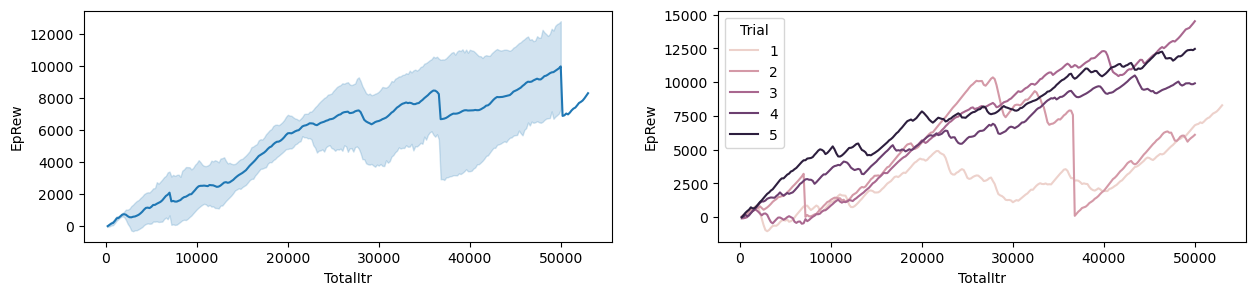

In [32]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
fig.set_figheight(3)
sns.lineplot(data=df, x="TotalItr", y="EpRew",ax=axs[0])
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue="Trial",ax=axs[1])



<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

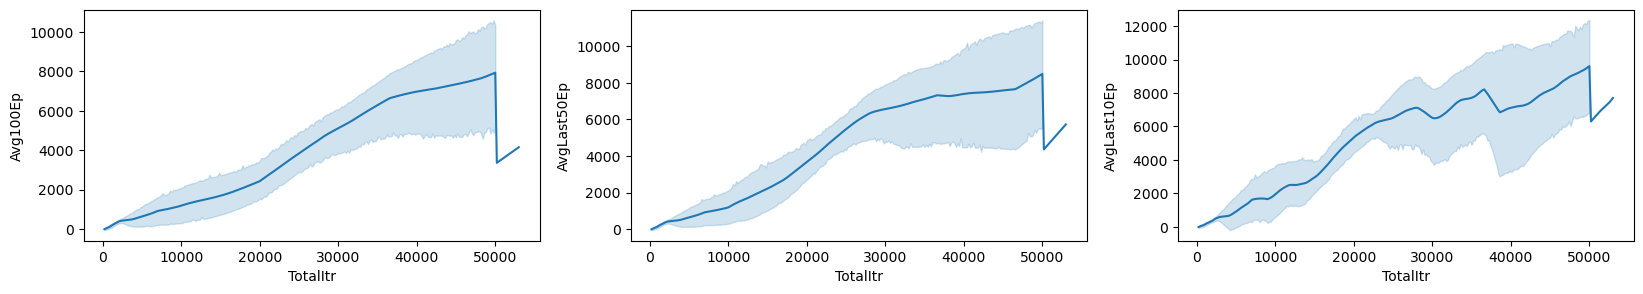

In [34]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(20)
fig.set_figheight(3)
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",ax=axs[0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",ax=axs[1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",ax=axs[2])